# Codigo de la figura 2.4: Modelo IF que no llega al umbral de disparo.


# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Creación de funciones

## Init_neurona:
Inicializa una neurona del modelo IF con parámetros específicos.

### Parámetros:
- `tau`: Constante de tiempo de la membrana neuronal.
- `umbral`: Umbral de disparo de la neurona (por defecto, infinito, sin disparo).
- `umbral_reset`: Umbral de reinicio de la neurona (por defecto, menos infinito).
- `v_reposo`: Potencial de reposo de la neurona.
- `v_reset`: Potencial de reinicio de la neurona.

### Retorna:
- Función `integrar_disparar` que simula la evolución temporal de la neurona.

## integrar_disparar:
Simula la evolución temporal de la neurona en respuesta a una corriente de entrada.

### Parámetros:
- `I_entrada`: Corriente de entrada.
- `paso_tiempo`: Paso de tiempo en la simulación.
- `duracion`: Duración total de la simulación.

### Retorna:
- `tiempos`: Array de tiempos durante la simulación.
- `v_membrana_lista`: Lista de potenciales de membrana a lo largo del tiempo.


In [2]:
def init_neurona(tau, umbral=np.inf, umbral_reset=-np.inf, v_reposo=0.0, v_reset=0.0):
    v_membrana = v_reposo

    def integrar_disparar(I_entrada, paso_tiempo, duracion):
        nonlocal v_membrana
        tiempos = np.arange(0, duracion, paso_tiempo)
        v_membrana_lista = []
        for t in tiempos:
            v_membrana += (I_entrada - v_membrana) * (1 - np.exp(-paso_tiempo / tau))
            v_membrana_lista.append(v_membrana)
            if v_membrana <= umbral_reset:
                v_membrana = v_reset
        return tiempos, v_membrana_lista
    return integrar_disparar

# 2. Variables de entorno

- `tau = 8`: Constante de tiempo de la membrana neuronal.
- `v_reposo = 0.0`: Potencial de reposo de la neurona.
- `neurona_sin_umbral`: Instancia de la neurona del modelo IF inicializada con los parámetros `tau` y `v_reposo`.
- `tiempos_sin_umbral, v_membrana_sin_umbral`: Resultados de la simulación de la neurona sin umbral con una corriente de entrada de 0.5, un paso de tiempo de 0.1 y una duración total de la simulación de 50.0 



In [3]:
tau = 8
v_reposo = 0.0
neurona_sin_umbral = init_neurona(tau, v_reposo=v_reposo)
tiempos_sin_umbral, v_membrana_sin_umbral = neurona_sin_umbral(0.5, 0.1, 50.0)

# 3. Dibujo de la gráfica

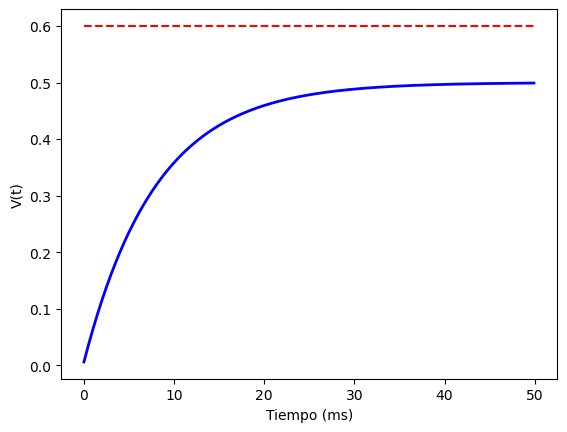

In [4]:
plt.plot(tiempos_sin_umbral, v_membrana_sin_umbral, label='Sin Umbral', linewidth=2, color='blue')
plt.xlabel('Tiempo (ms)')
plt.hlines(y=0.6, xmin=0, xmax=50, color='red', linestyle='--', label='$I_0$')
plt.ylabel('V(t)')
plt.show()